# Power Production

### Brief 
Create a web service that uses machine learning to make predictions based on the data set powerproduction.The goal is to
produce a model that accurately predicts wind turbine power output from wind speed values, as in the data set. You must then develop a web service that will respond with predicted power values based on speed values sent as HTTP requests. 

In [75]:
%%time
# Magic Command that Displays Cell/Wall Times. Useful for Optimisation.

# Import packages.
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns

import matplotlib.pyplot as plt
# import tensorflow.keras as kr

%matplotlib inline

# plt.rcParams['figure.figsize'] = (7, 5)

# Import Raw Data and Display Values.
raw = pd.read_csv("./powerproduction.csv", delimiter = ',')

Wall time: 2.5 ms


### A Selection of Random Values from the Dataset to Verify that it Imported Correctly.

In [76]:
# A Sample of Values from the Dataset.
raw.sample(15)
# This Displays Random Entries' Index Number, Speed Value and Power Value.

,speed,power
273,13.989,65.596
499,25.000,0.000
424,21.321,98.682
46,2.227,2.869
430,21.622,103.433
465,23.373,104.977
482,24.049,93.524
205,10.360,28.181
447,22.497,109.932
157,7.808,13.142


### Null Values are Purged to Ensure they Do Not Effect the Results.

In [77]:
%%time
# Select Null Values.
ds = raw[(raw["speed"]==0) & (raw["power"]==0)]
# Keep all Values that ARENT Null
not_null = raw[(raw["speed"]>0) & (raw["power"]>0)]
ds = ds.append(not_null)
print (ds)
print(ds.shape)

      speed    power
0     0.000    0.000
5     0.325    4.331
6     0.400    5.186
7     0.450    3.826
8     0.501    1.048
..      ...      ...
485  24.249  103.700
486  24.299   93.694
487  24.349   93.078
488  24.374   98.223
489  24.399   95.117

[452 rows x 2 columns]
(452, 2)
Wall time: 3.5 ms


### An Overview of the Data.

In [78]:
%%time
# A General Overview of Pertainent Statistics.
ds.describe(include = 'all') 

Wall time: 4 ms


,speed,power
count,452.000000,452.000000
mean,12.975531,53.113478
std,6.855738,40.554469
min,0.000000,0.000000
25%,7.294500,8.412750
50%,13.013000,56.123500
75%,18.775250,94.698250
max,24.399000,113.556000


## Model Training Function



Now we put the speed and power values into arrays to use in training and testing.

Text(0.5, 0, 'Wind_Speed')

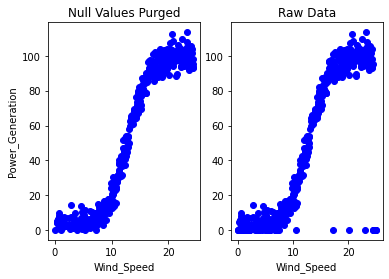

In [79]:
X = ds.iloc[:, 0].values.reshape(-1, 1) # Power Values Stored as Y.
Y = ds.iloc[:, 1].values.reshape(-1, 1) # Power Values Stored as Y.

A = np.array(raw[['speed']]) # Speed Values Stored as X.
B = np.array(raw[['power']]) # Power Values Stored as Y.

x = np.reshape(-1, 1)

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.scatter(X,Y,color="blue") # Plot a graph with X(Wind Speed) vs Y(Power Generation).
ax1.set_title('Null Values Purged')
ax1.set_xlabel('Wind_Speed')
ax1.set_ylabel('Power_Generation')


ax2.scatter(A,B,color="blue") # Plot a graph with X(Wind Speed) vs Y(Power Generation).
ax2.set_title('Raw Data')
ax2.set_xlabel('Wind_Speed')

Here we create an "X" and "Y" dataset for "X_train", "X_test" and "Y_train", "Y_test". Here we set 25% of the data as the test dataset and use the remaining for the training dataset. We create regressor then we fit "X_train" and "Y_train" into the regressor model.



# Regression

In [80]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size = 0.7,test_size = 0.3,random_state=10) # Creating Training & Testing Dataset.
regressor = LinearRegression() # Creating a Regressor.
regressor.fit(X_train,Y_train) # Fitting the Dataset into the Model.

LinearRegression()

Now we Display the Test Dataset (X_test and Y_test datasets) and draw the Regression Line.

In [81]:
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
  
X_poly     # prints X_poly
 
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,Y)

LinearRegression()

In [82]:
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,Y)

LinearRegression()

Text(0.5, 0, 'Wind_Speed')

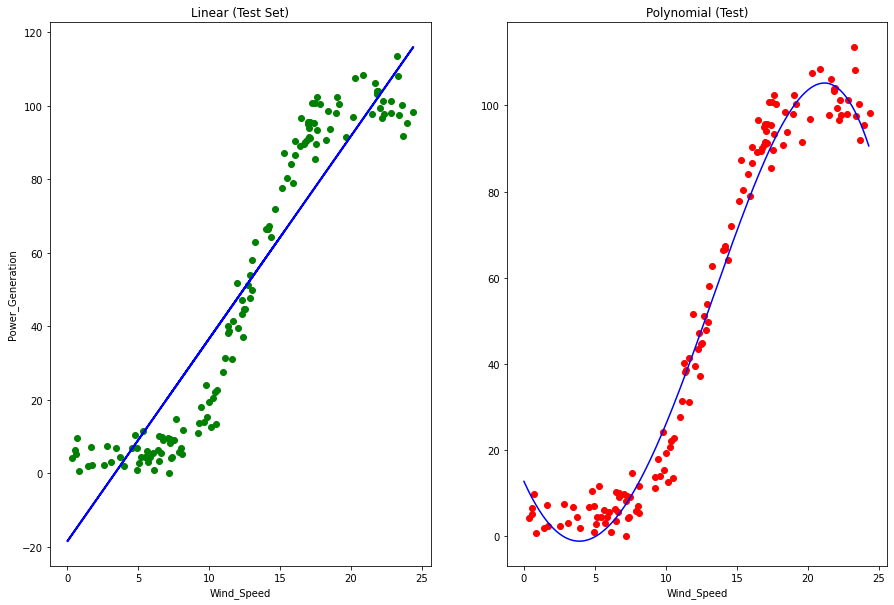

In [83]:
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape(len(X_grid),1) 

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,10))
#ax1.set_legend(loc='Data-Point')

ax1.plot(X_train,regressor.predict(X_train),color="blue",linewidth=2)
ax1.scatter(X_test,Y_test,color="green", label='Data-point')
ax1.set_title('Linear (Test Set)')
ax1.set_xlabel('Wind_Speed')
ax1.set_ylabel('Power_Generation')


ax2.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)),color='blue')
ax2.scatter(X_test,Y_test,color="red")
ax2.set_title('Polynomial (Test)')
ax2.set_xlabel('Wind_Speed')

Now we Display the Training Datasets (X_train and Y_train datasets) and draw the Regression Line.

Text(0.5, 0, 'Wind_Speed')

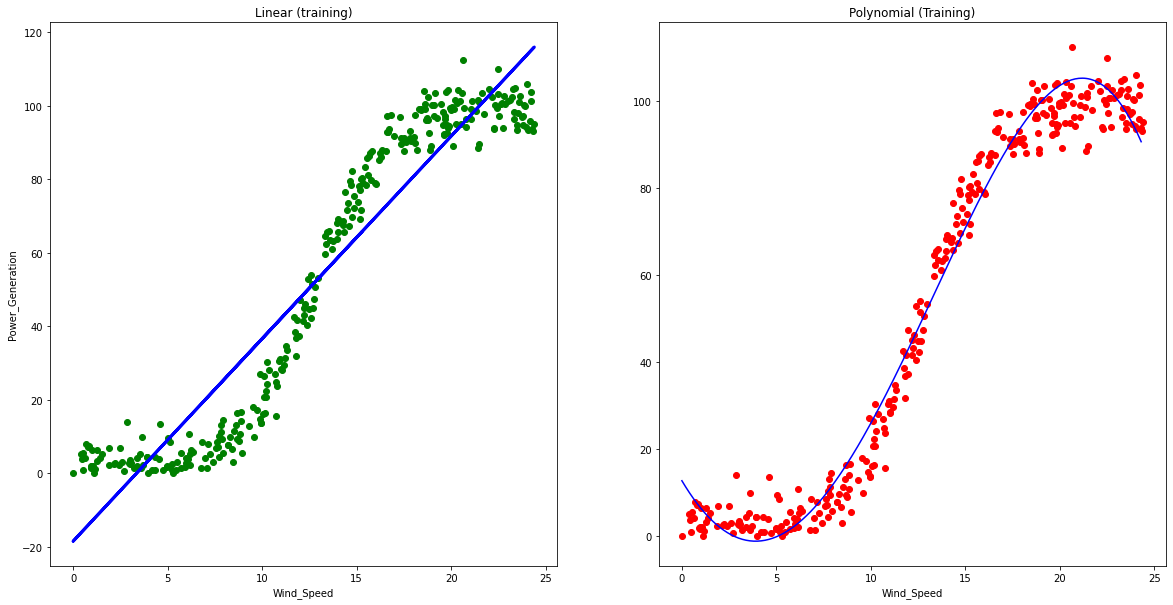

In [84]:
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape(len(X_grid),1) 

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,10))

ax1.plot(X_train,regressor.predict(X_train),color="blue",linewidth=3)
ax1.scatter(X_train,Y_train,color="green")
ax1.set_title('Linear (training)')
ax1.set_xlabel('Wind_Speed')
ax1.set_ylabel('Power_Generation')

ax2.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)),color='blue')
ax2.scatter(X_train,Y_train,color="red")
ax2.set_title('Polynomial (Training)')
ax2.set_xlabel('Wind_Speed')

In [85]:
Y_pred = regressor.predict(X_test)
print('R2 score: %.2f' % r2_score(Y_test,Y_pred)) # R2 Score

R2 score: 0.89


In [86]:
print('Mean Error :',mean_squared_error(Y_test,Y_pred)) # The Mean Error

Mean Error : 181.17865174197422


In [87]:
def power_gen(power): # A function to predict the power generation according to wind speed
    result = regressor.predict(np.array(power).reshape(1, -1))
    return(result[0,0])

In [ ]:
wind_speed = float(input('Enter Wind_Speed : '))
print('Power_Generated : ', int(power_gen(wind_speed)))

### Using StatsModel


In [ ]:
X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(Y_train, X_train_sm).fit()

plt.scatter(X_train, Y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

In [ ]:
X_train_lm, X_test_lm, Y_train_lm, Y_test_lm = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 100)


In [ ]:
# Shape of the train set without adding column
X_train_lm.shape

# Adding additional column to the train and test data
X_train_lm = X_train_lm.reshape(-1,1)
X_test_lm = X_test_lm.reshape(-1,1)

# Creating an object of Linear Regression
lm = LinearRegression()

# Fit the model using .fit() method
lm.fit(X_train_lm, Y_train_lm)

In [ ]:
# Intercept value
print("Intercept :",lm.intercept_)

# Slope value
print('Slope :',lm.coef_)

In [ ]:
# Making Predictions of y_value
Y_train_pred = lm.predict(X_train_lm)
Y_test_pred = lm.predict(X_test_lm)

# Comparing the r2 value of both train and test data
print(r2_score(Y_train,Y_train_pred))
print(r2_score(Y_test,Y_test_pred))